https://drive.google.com/file/d/1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ/view?usp=sharing - датасет в облаке

https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions - данные с Kaggle

**Данные представлены выше.**

Бизнес постановка задачи: какие лица будут брать срочный депозит, а какие нет.

ML-задача: анализируя различные характеристики клиентов банка, а именно - возраст, работа, семейное положение и так далее, построим модель что будет предсказывать какие люди будут брать депозит - строка y. Задача классификации людей, которые берут депозит или нет.

В качестве метрик для оценки модели мы выбрали матрицу ошибок (confusion matrix) и точность (accuracy). Эти метрики помогут глубже понять, насколько хорошо модель справляется с задачей. Матрица ошибок даст представление о частоте ложных срабатываний — как ложноположительных, так и ложноотрицательных предсказаний. Точность (accuracy) покажет общее соответствие предсказаний модели фактическим значениям, давая общую оценку её успешности.

In [33]:
! gdown --id 1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ # архив в гугле

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ
To: /content/archive.zip
100% 554k/554k [00:00<00:00, 113MB/s]


In [34]:
! unzip /content/archive.zip # распаковка архива

Archive:  /content/archive.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [166]:
import plotly.express as px

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [161]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [37]:
# будем игнорировать предупреждения
import warnings
warnings.simplefilter('ignore')

In [38]:
df = pd.read_csv("/content/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [40]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Мне не нравится, что получение или не получение депозита - y, сделаем другое имя столбца и сделаем этот признак категориальным. Sklearn - переведёт данные default, loan, housing - в категории

headers = ['age',	'job',	'marital',
           'education',	'default',	'balance',
           'housing',	'loan',	'contact'	'day',
           'month',	'duration',	'campaign',	'pdays',	'previous',
           'poutcome',	'y']

In [41]:
headers = [	'default', 'housing',	'loan',	'y']

In [42]:
for i in headers:
  df[i] = [1 if i == 'yes' else 0 for i in df[i]]

df['marital'] = [1 if i == 'married' else 0 for i in df['marital']]

In [43]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,0,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,1,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [44]:
df_test = pd.read_csv("/content/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: xlabel='age', ylabel='Density'>

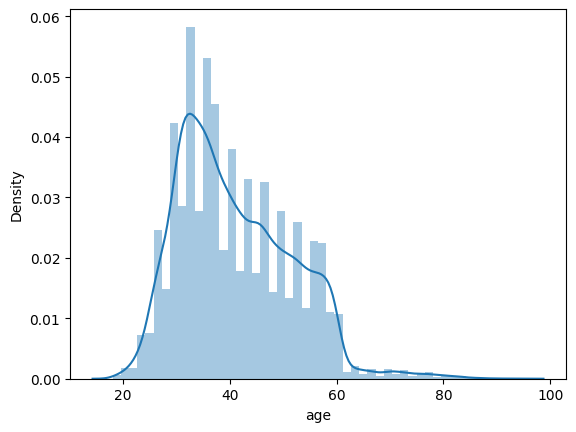

In [45]:
sns.distplot(df['age'], kde=True)

Большая часть клиентов банка в возрасте от 25  до 40 лет

11 разных профессий и люди неуказавшие професию

In [46]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

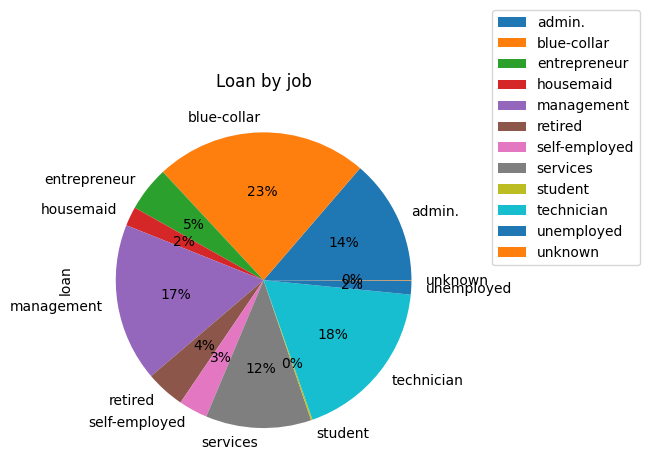

In [47]:
ax = df.groupby(['job']).sum().plot(kind='pie', y='loan', autopct='%1.0f%%', title='Loan by job')
ax.legend(bbox_to_anchor = (1.1, 1.25), loc = 'upper left')
plt.show()

In [48]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

Многие клиенты имеют полное среднее образование, что видно на круговой диаграмме

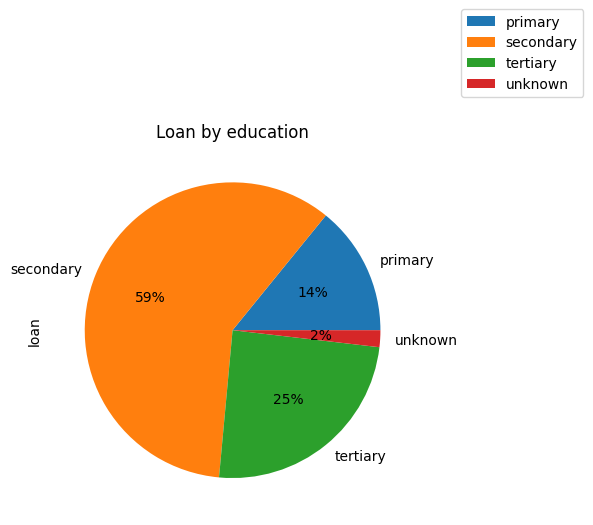

In [49]:
ad = df.groupby(['education']).sum().plot(kind='pie', y='loan', autopct='%1.0f%%', title='Loan by education')
ad.legend(bbox_to_anchor = (1.1, 1.25), loc = 'center left')
plt.show()

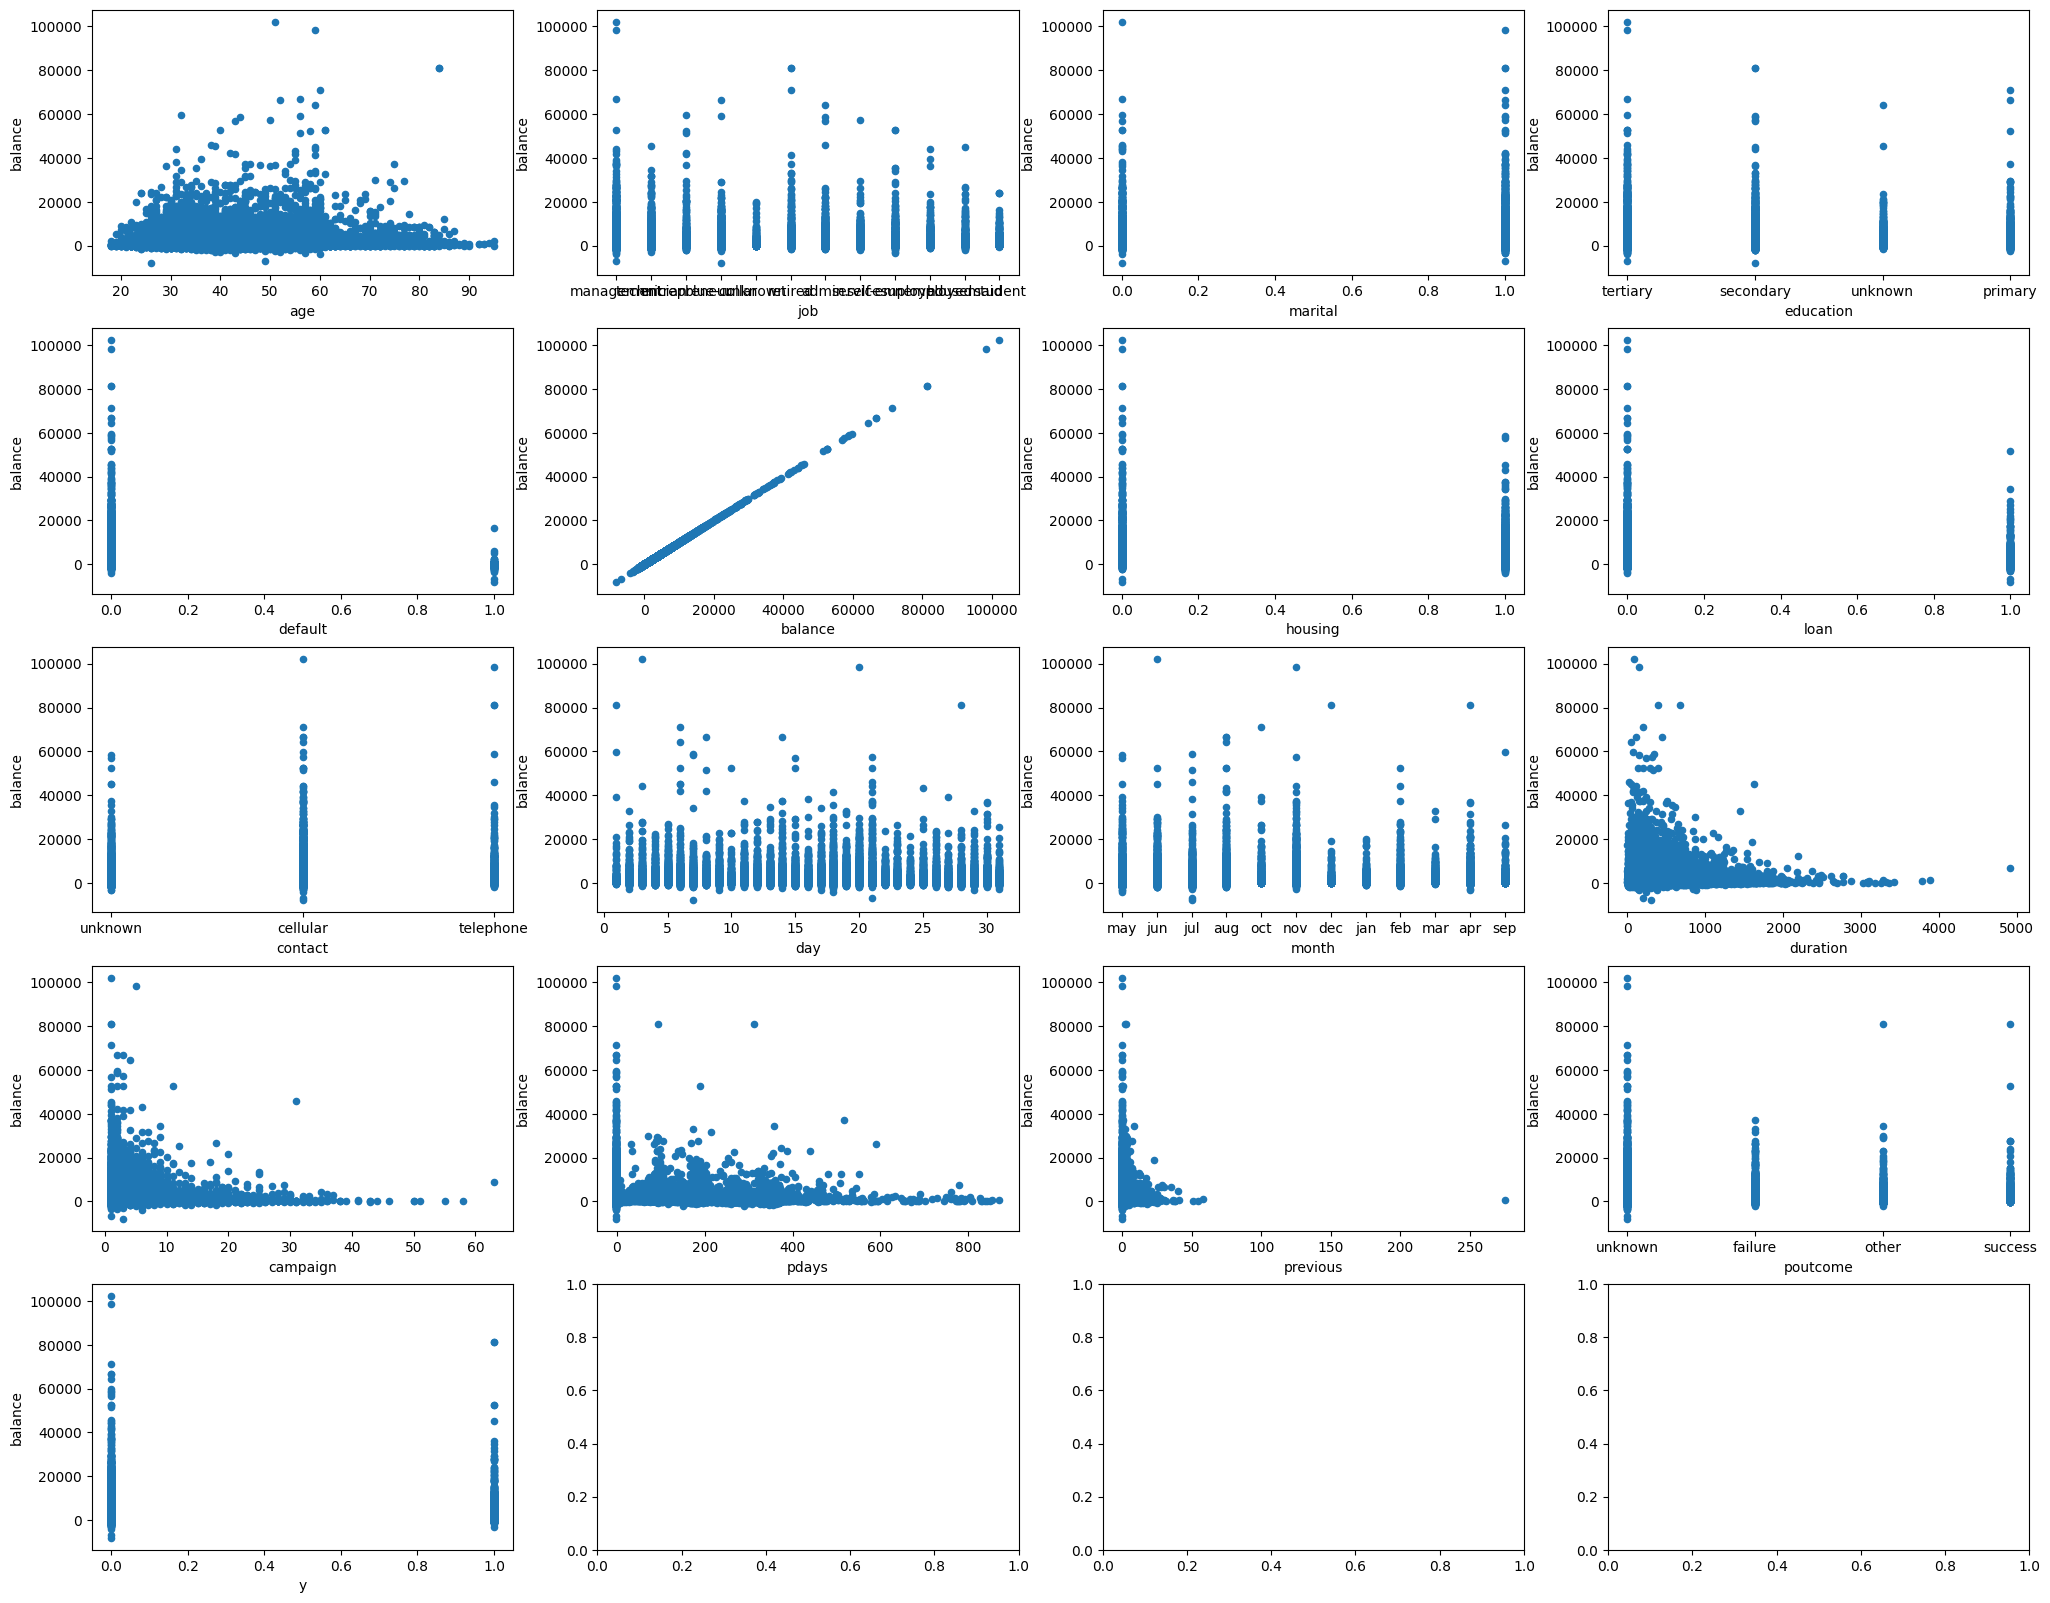

In [50]:
# посмотрим завимости данных на диаграммах рассения
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
   df.plot(feature, "balance", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [51]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

Рассмотрим соотношение клиентов, взявших и не взявших депозит: 0 — не взяли депозит, 1 — взяли депозит. 0 - нет, 1 - да

<Axes: xlabel='y', ylabel='count'>

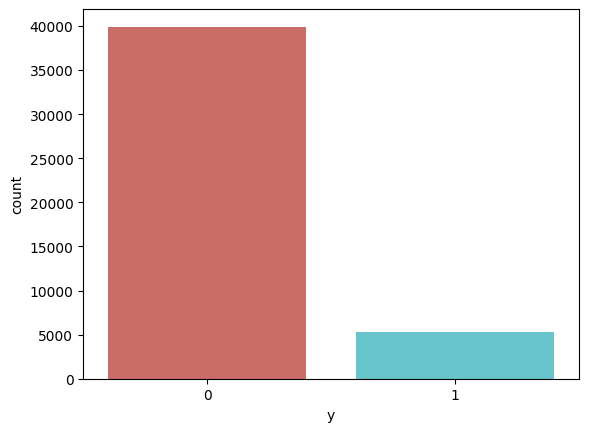

In [52]:
sns.countplot(x='y', data=df, palette='hls')

Людей, что не брали депозит намного больше, чем других

Сгрупируем признаки по "y", чтобы посмотреть моды значений для клиентов с депозитом и без

Средний возраст взявших депозит не сильно отличается от тех, кто не брал, однако те, кто взяли депозит имеют больше денег на счету и дольше не обращались в банк(pdays), однако время обращения большое(duration), но меньше обращались в банк(campaign)

In [53]:
df.groupby('y').mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,,
0,40.838986,0.612670,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.520892,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


Странно, получается соглано этим данным одинокие люди чаще берут депозит, но почему-то думается, что должно быть иначе

In [54]:
df.groupby('marital').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
marital,,,,,,,,,,,
0,37.198366,0.020392,1266.018948,0.545035,0.143579,15.733733,265.346224,2.644330,43.596155,0.616269,0.140801
1,43.408099,0.016462,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235


Люди имеющие высшее образование и с неизвестным уровнем образования чаще берут депозиты?

In [55]:
df.groupby('education').mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
education,,,,,,,,,,,,
primary,45.865567,0.765728,0.018537,1250.949934,0.568384,0.149467,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,0.593483,0.019740,1154.880786,0.605034,0.185458,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,0.529133,0.014886,1758.416435,0.479513,0.134125,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,0.624663,0.017232,1526.754443,0.441572,0.071621,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


Разных профессий слишком много, не слишком информативная таблица получилась ниже. Хотя интерсено, что retired и students больше в данных, или они и правда чаще берут депозит, или представленность их датасете просто больше.

In [56]:
df.groupby('job').mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
job,,,,,,,,,,,,
admin.,39.289886,0.520789,0.014311,1135.838909,0.615355,0.191646,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,0.715988,0.020654,1078.826654,0.724209,0.173037,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,0.719570,0.036987,1521.470074,0.584398,0.239408,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,0.735484,0.017742,1392.395161,0.320968,0.122581,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,0.570945,0.017340,1763.616832,0.494608,0.132480,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,0.764576,0.011484,1984.215106,0.216873,0.136484,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,0.628879,0.020899,1647.970868,0.484484,0.145028,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,0.579442,0.018055,997.088108,0.665864,0.201252,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,0.057569,0.003198,1388.060768,0.265458,0.012793,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


Из графика можно сделать вывод, чем сложнее работа, тем меньше/больше людей из этой категории не берут депозит. (admin, blue-colar, managment, technician)

(Text(0.5, 0, 'job'), Text(0, 0.5, 'Freguancy geting loan'))

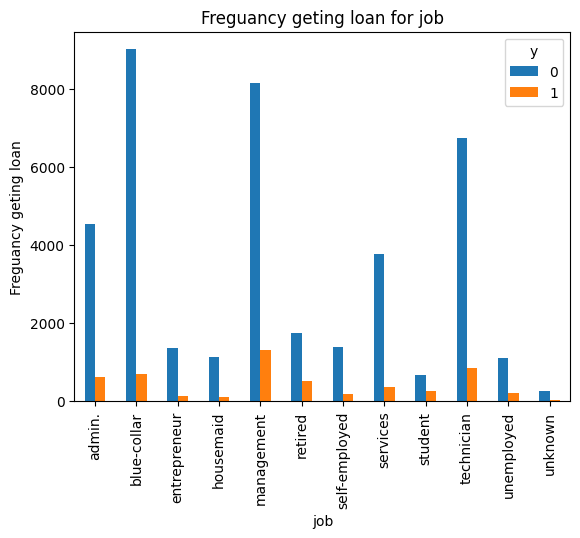

In [57]:
pd.crosstab(df['job'], df['y']).plot(kind='bar')
plt.title('Freguancy geting loan for job')
plt.xlabel('job'), plt.ylabel('Freguancy geting loan')

Видно, что частота взятия депозита зависит от должности, но не совсем ясно как.

In [58]:
table = pd.crosstab(df['education'], df['y'])
table

y,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


Видно, что от уровня образования зависит наличие депозита. И что люди secondary - наш 10-11 класс берут депозит чаще других. Скорее всего на обучение в ВУЗ или для открытия своего дела. Однако люди с высшим тоже берут много депозитов.

Значения категориальных столбцов нужно сделать более удобными

In [59]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
  cat_list ='var' + '_' + var
  cat_list = pd.get_dummies(df[var], prefix=var)
  data=df.join(cat_list)
  df=data

cat_vars = ['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

data_fin = df[to_keep]
data_fin.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_0',
       'marital_1', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_0',
       'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

#перевёдем значение столбцов в диапазон от 0 до 1

неудачный выбор перевода котегорий, поэтому выше прописала через генератор


```
#
numerical_columns = df.select_dtypes
(include=['int64', 'float64']).columns
scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())Выбран кодовый формат
```



Что-то в этом графике ничего непонятно из-за большого разброса в диапазонах значений, надо было построить два разных графика

<Axes: >

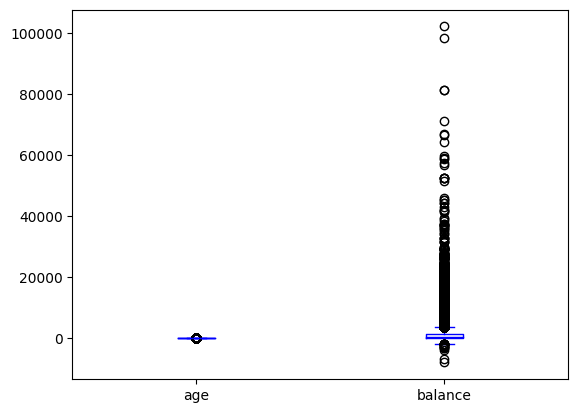

In [60]:
df.boxplot(column=['age', 'balance'], grid=False, color='blue')

Тут виднее, что возраст не сильно влиет на количество денег на счету

In [170]:
fig = px.scatter(x=df['age'], y=df['balance'])
fig.show()

In [61]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  int64 
 3   education            45211 non-null  object
 4   default              45211 non-null  int64 
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  int64 
 7   loan                 45211 non-null  int64 
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  month                45211 non-null  object
 11  duration             45211 non-null  int64 
 12  campaign             45211 non-null  int64 
 13  pdays                45211 non-null  int64 
 14  previous             45211 non-null  int64 
 15  poutcome             45211 non-null  object
 16  y   

Отлично, теперь добавленные ячейки выглядят,  как нули и единицы

Нужно удалить ячейки, что имеют тип object, так как они теперь дублируют информацию

In [159]:
cols_to_drop = ['job', 'education', 'contact', 'poutcome', 'month', 'default', 'previous']
df.drop(columns=cols_to_drop, inplace=True)

In [164]:
del df['pdays']

In [165]:
df

,age,marital,balance,housing,loan,day,duration,campaign,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,2143,1,0,5,261,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,1,2,1,1,5,76,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1,1506,1,0,5,92,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,0,0,17,977,3,1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,1,5715,0,0,17,1127,5,1,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,1,668,0,0,17,508,4,0,0,...,0,0,0,1,0,0,0,0,0,1


Надо привести все оставшиеся данные в диапазон от 0 до 1, то есть возраст, баланс, duration и так далее
Будем использоавать MinMaxscaler

In [179]:
scaler = MinMaxScaler(feature_range=(0, 1))

df['age'] = scaler.fit_transform(df[['age']])
df['balance'] = scaler.fit_transform(df[['balance']])
df['duration'] = scaler.fit_transform(df[['duration']])
df['day'] = scaler.fit_transform(df[['day']])
df['campaign'] = scaler.fit_transform(df[['campaign']])

Проверим на что получилось с помощью баланса

In [180]:
df['balance']

0        0.092259
1        0.073067
2        0.072822
3        0.086476
4        0.072812
           ...   
45206    0.080293
45207    0.088501
45208    0.124689
45209    0.078868
45210    0.099777
Name: balance, Length: 45211, dtype: float64

In [70]:
colmns = to_keep
print(colmns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_0', 'marital_1', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


Необходимо оценить степень взаимосвязи между данными. С помощью тепловой карты можно выявить признаки, которые имеют значительную корреляцию друг с другом

<Axes: >

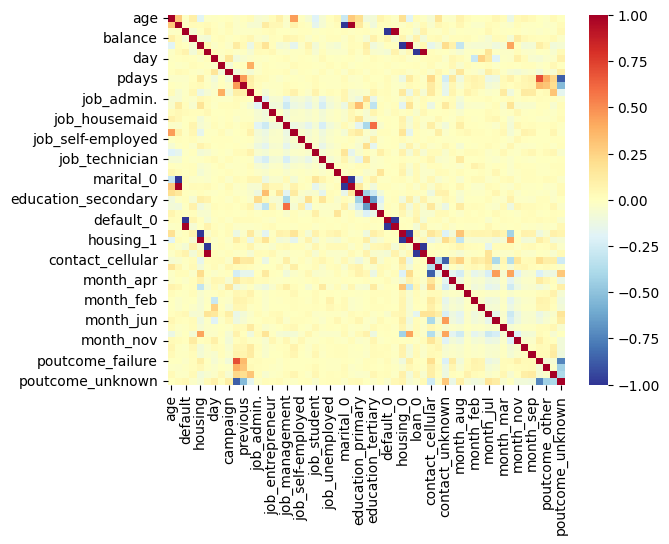

In [62]:
sns.heatmap(df.corr(), cmap="RdYlBu_r")

Следует удалить исходные столбцы без разбивки из начального датасета, так как они дублируют информацию, представленную в новых столбцах

In [63]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [181]:
df.to_csv('test_output.csv', encoding='utf-8')

Построим baseline модель и модель логистической регрессии. Было бы интересно исследовать зависимость наличия депозита от таких факторов, как возраст и уровень образования. Для тренировки

Уберём колонки, что имеют тип object так как мы закодировали их в тип unit и нам не нужны повторния

In [195]:
X = df.drop(['y'], axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

In [190]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.8790586569937184

Строим частный случай линейного классификатора, а именно логистическую регрессию.
Полученная точность равна 0.889

In [191]:
lr =LogisticRegression()
lr.fit(X_train, y_train)
y_pred_log_reg = lr.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.897549323188534

In [192]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9936
           1       0.66      0.32      0.43      1367

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



Baseline модель логистической регрессии демонстрирует высокую точность (accuracy) на уровне 90%, что свидетельствует о хорошей способности модели правильно классифицировать большую часть наблюдений. Однако это в основном связано с тем, что модель хорошо предсказывает класс "0" (без депозита), достигнув для него precision и recall 91% и 98% соответственно. Для класса "1" (с депозитом) результаты значительно слабее: precision составляет 66%, а recall — всего 32%, что указывает на трудности модели в обнаружении положительных случаев. Это также подтверждается низким значением F1-меры для класса "1" (43%), что говорит о дисбалансе модели в предсказании разных классов.

In [193]:
confusion_matrix(y_test, y_pred_dummy)

array([[9936,    0],
       [1367,    0]])